In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
file_path = "C:/Users/SR/Desktop/Entry python(jupiter notebook)/NOTEBOOKS/CODECLAN/sales_data_sample_1.csv" 

df = pd.read_csv(file_path,encoding="ISO-8859-1")  
print(df.head(30))  

    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0         10107               30      95.70                2  2871.00   
1         10121               34      81.35                5  2765.90   
2         10134               41      94.74                2  3884.34   
3         10145               45      83.26                6  3746.70   
4         10159               49     100.00               14  5205.27   
5         10168               36      96.66                1  3479.76   
6         10180               29      86.13                9  2497.77   
7         10188               48     100.00                1  5512.32   
8         10201               22      98.57                2  2168.54   
9         10211               41     100.00               14  4708.44   
10        10223               37     100.00                1  3965.66   
11        10237               23     100.00                7  2333.12   
12        10251               28     100.00        

In [5]:
df = df.drop(columns=["POSTALCODE","TERRITORY","DEALSIZE","TERRITORY","CITY","STATE","ADDRESSLINE1","ADDRESSLINE2","STATUS","QTR_ID","ORDERLINENUMBER"])  


In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


1.**Total Revenue Per Year & Month**

   Year_Month       SALES
0      2003-1   129753.60
1     2003-10   568290.97
2     2003-11  1029837.66
3     2003-12   261876.46
4      2003-2   140836.19
5      2003-3   174504.90
6      2003-4   201609.55
7      2003-5   192673.11
8      2003-6   168082.56
9      2003-7   187731.88
10     2003-8   197809.30
11     2003-9   263973.36
12     2004-1   316577.42
13    2004-10   552924.25
14    2004-11  1089048.01
15    2004-12   372802.66
16     2004-2   311419.53
17     2004-3   205733.73
18     2004-4   206148.12
19     2004-5   273438.39
20     2004-6   286674.22
21     2004-7   327144.09
22     2004-8   461501.27
23     2004-9   320750.91
24     2005-1   339543.42
25     2005-2   358186.18
26     2005-3   374262.76
27     2005-4   261633.29
28     2005-5   457861.06


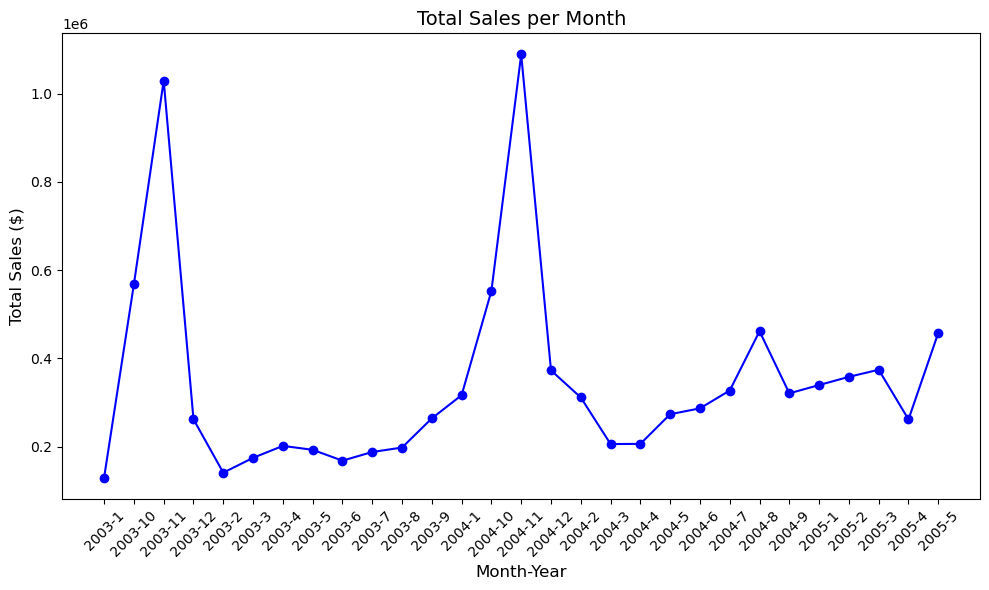

In [9]:

df['Year_Month'] = df['YEAR_ID'].astype(str) + '-' + df['MONTH_ID'].astype(str)

MonthlySales = df.groupby('Year_Month')['SALES'].sum().reset_index()

print(MonthlySales)



plt.figure(figsize=(10, 6))
plt.plot(MonthlySales['Year_Month'], MonthlySales['SALES'], marker='o', color='b')


plt.title('Total Sales per Month', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)  


plt.tight_layout()  
plt.show()

2.**CountryWiseSales**

        COUNTRY       SALES
0     Australia   630623.10
1       Austria   202062.53
2       Belgium   108412.62
3        Canada   224078.56
4       Denmark   245637.15
5       Finland   329581.91
6        France  1110916.52
7       Germany   220472.09
8       Ireland    57756.43
9         Italy   374674.31
10        Japan   188167.81
11       Norway   307463.70
12  Philippines    94015.73
13    Singapore   288488.41
14        Spain  1215686.92
15       Sweden   210014.21
16  Switzerland   117713.56
17           UK   478880.46
18          USA  3627982.83


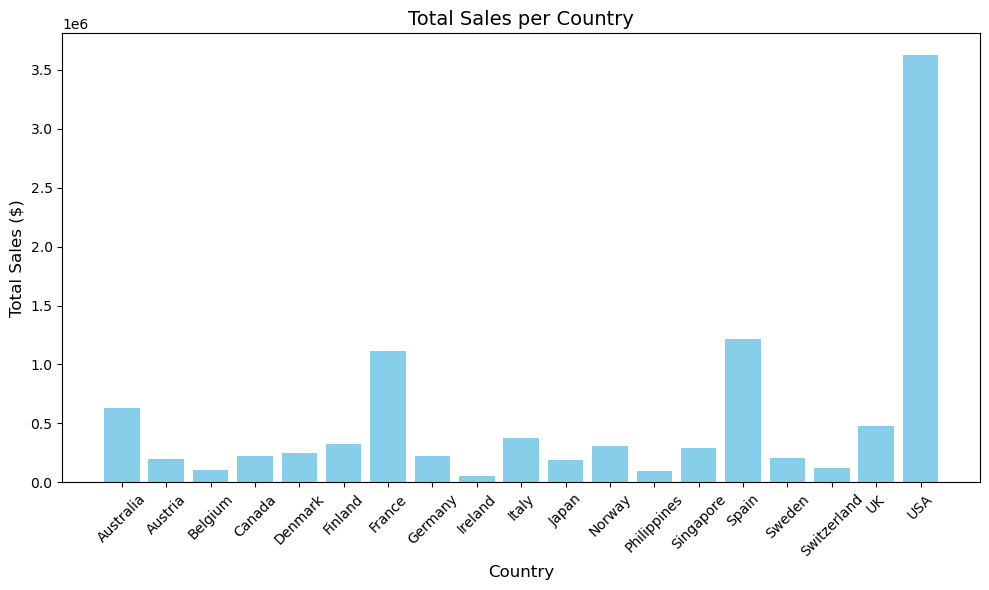

In [10]:
CountryWiseSales = df.groupby('COUNTRY')['SALES'].sum().reset_index()

print(CountryWiseSales)


plt.figure(figsize=(10, 6))
plt.bar(CountryWiseSales['COUNTRY'], CountryWiseSales['SALES'], color='skyblue')


plt.title('Total Sales per Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45) 


plt.tight_layout() 
plt.show()

3. **Customer Analysis:**

         FullName      SALES
0    Diego Freyre  912294.11
1  Valarie Nelson  654858.06
2  Peter Ferguson  200995.41
3      Jeff Young  197736.94
4  Janine Labrune  180124.90


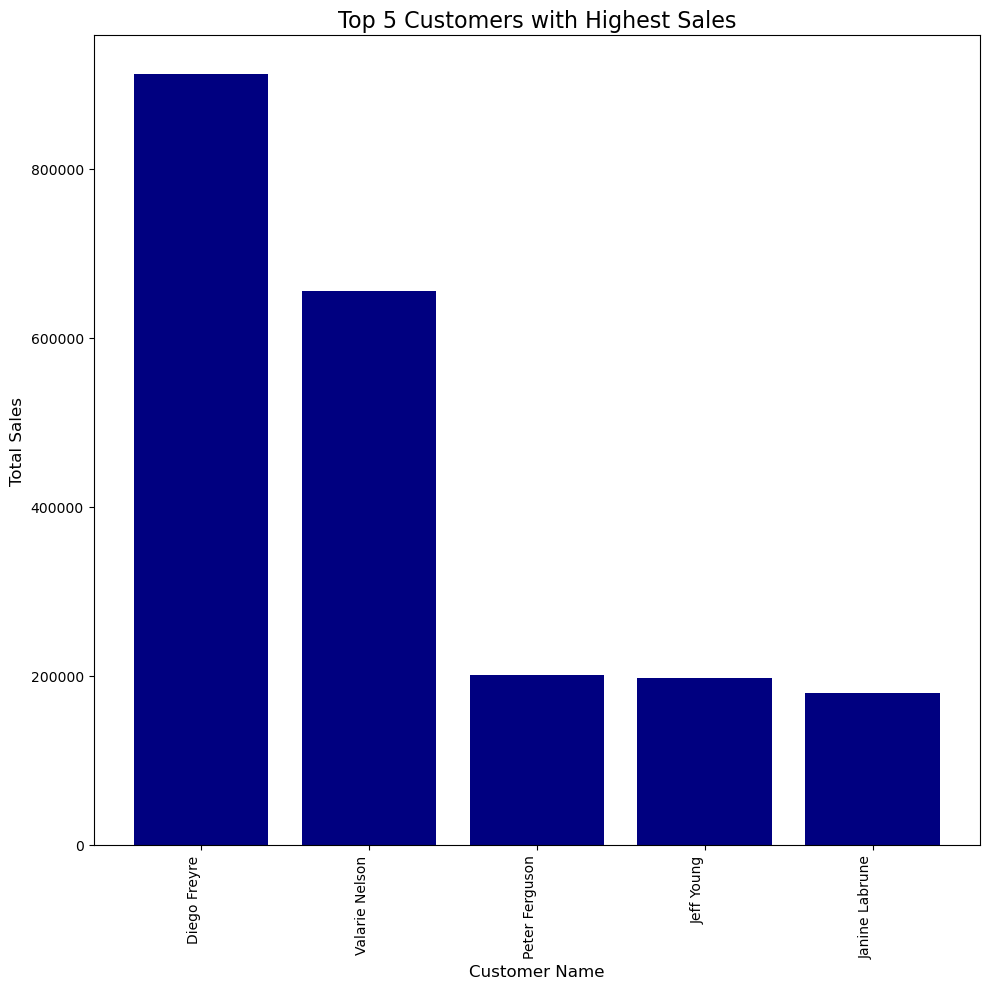

In [11]:

df['FullName'] = df['CONTACTFIRSTNAME'] + ' ' + df['CONTACTLASTNAME']
CustomerSales = df.groupby("FullName")['SALES'].sum().reset_index()
TopCustomerSales=CustomerSales.sort_values(by='SALES', ascending=False).reset_index(drop=True).head(5)
print(TopCustomerSales)


plt.figure(figsize=(10, 10))
plt.bar(TopCustomerSales ['FullName'], TopCustomerSales ['SALES'], color='navy')
plt.title('Top 5 Customers with Highest Sales', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()


plt.show()